## Import libraries

In [1]:
# basic staff
import numpy as np
import pandas as pd
import seaborn as sns
import time

# need for learning and drawing
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# some datasets
from keras.datasets import mnist
from sklearn.datasets import load_digits

from functions import get_func
from LossFunctions.LogLoss import LogLoss

# Networks
from Network.RNN import RecurrentNetwork
from Network.Network import Network

# Layers
from Layers.InputLayer import InputLayer
from Layers.Flatten import Flatten
from Layers.SimpleLayer import Layer
from Layers.SimpleRNN import RecurrentLayer
from ConvLayer.Conv_2D import Conv2D
from ConvLayer.Poolers import *

## Layer and Network implementation

## Plotting data and results

In [2]:
def plot_decision_regions(X, y, classifier, resolution=0.02, draw_samples=True):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    points = np.array([xx1.ravel(), xx2.ravel()]).T
    Z = np.argmax(classifier.predict(points), axis=1)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    if draw_samples:
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, color=cmap(idx), marker=markers[idx], label=cl)

In [3]:
def draw_data(x, y):
    data = {'X1': x[:,0], 'X2': x[:,1], 'Y': y}
    data = pd.DataFrame(data)
    
    sns.scatterplot(data, x='X1', y='X2', style='Y', hue='Y', palette="Spectral")
    plt.legend()
    plt.show()

In [4]:
def transform_y(y):
    elems = set(y)
    
    new_y = np.zeros(shape=(len(y), len(elems)), dtype=float)
    for elem in elems:
        new_y[:,elem] = (y == elem)
    
    return new_y

## Train-Test and Results

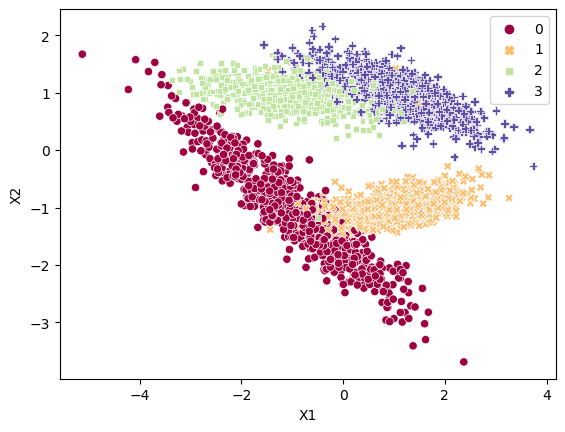

In [47]:
#X, Y = datasets.make_circles(n_samples=3000, shuffle=True, noise=0.04)
X, Y = datasets.make_classification(n_samples=3000, n_features=2, n_classes=4, n_informative=2, n_redundant=0, 
                                    n_clusters_per_class=1, class_sep=1.0)
draw_data(X, Y)

In [48]:
X_train, X_test, y_train, y_real = train_test_split(X, Y, test_size=0.2)

In [49]:
y_train = transform_y(y_train)
y_test = transform_y(y_real)

# Create Network and fit it

In [75]:
input_layer = InputLayer(n=2)
h1 = Layer(n=9, activation='sigmoid', i_n=input_layer.n)
h2 = Layer(n=4, activation='tanh', i_n=h1.n)
out_layer = Layer(n=4, activation='linear', i_n=h2.n)

network = Network([input_layer, h1, h2, out_layer], loss='LogLoss', final_activation='softmax')

Progress: 0% 20% 40% 60% 80% 100%
Time = 0.17 sec


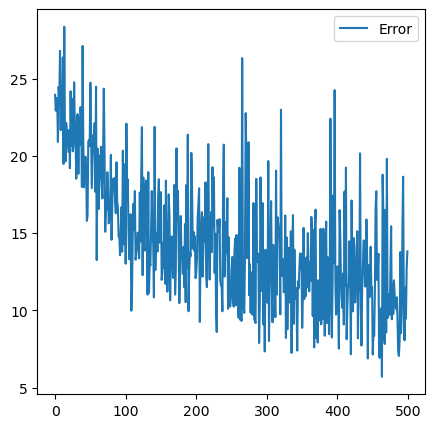

In [80]:
network.stochastic_fit(X_train, y_train, lr=0.1, batch_size=35, n_rounds=500)

In [81]:
error_func = LogLoss()
error = 0.0

predicts = network.predict(X_test) 
error += error_func.func(predicts, y_test)
print('Erorr value = {}'.format(error))

predicts = np.argmax(predicts, axis=1)
print('Accuracy_Score = {}'.format(accuracy_score(predicts, y_real)))
print('Precision_Score = {}'.format(precision_score(predicts, y_real, average='macro')))

print('Recall_Score = {}'.format(recall_score(predicts, y_real, average='macro')))

Erorr value = 167.59219476105704
Accuracy_Score = 0.91
Precision_Score = 0.9090311566367903
Recall_Score = 0.9103794678436399


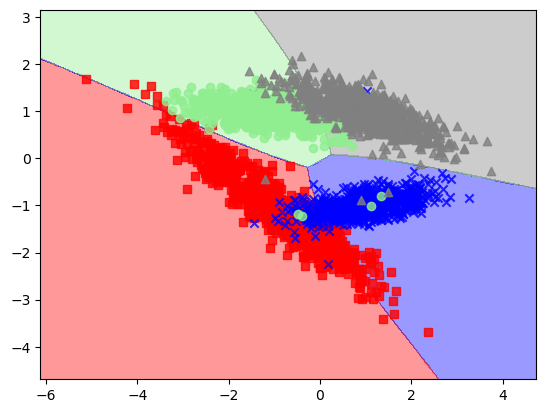

In [82]:
plot_decision_regions(X, Y, network, resolution=0.02, draw_samples=True)

## Let's try on dataset with digits

In [14]:
digits = load_digits()

In [15]:
X_train, X_test, y_train_real, y_real = train_test_split(digits['data'], digits['target'], shuffle=True, test_size=0.3)

In [16]:
y_train = transform_y(y_train_real)
y_test = transform_y(y_real)

In [18]:
# Create Network Architecture
inpt_layer = InputLayer(n=X_train.shape[1])
h1 = Layer(n=17, i_n=inpt_layer.n)
h2 = Layer(n=17, activation='tanh', i_n=h1.n)
out_layer = Layer(n=10, i_n=h2.n, activation='linear')

network = Network([inpt_layer, h1, h2, out_layer], loss='LogLoss', final_activation='softmax')

Epoch #1: 0% 20% 40% 60% 80% 100%
Epoch #2: 0% 20% 40% 60% 80% 100%
Epoch #3: 0% 20% 40% 60% 80% 100%
Epoch #4: 0% 20% 40% 60% 80% 100%
Epoch #5: 0% 20% 40% 60% 80% 100%
Epoch #6: 0% 20% 40% 60% 80% 100%
Epoch #7: 0% 20% 40% 60% 80% 100%
Epoch #8: 0% 20% 40% 60% 80% 100%
Epoch #9: 0% 20% 40% 60% 80% 100%
Epoch #10: 0% 20% 40% 60% 80% 100%
Epoch #11: 0% 20% 40% 60% 80% 100%
Epoch #12: 0% 20% 40% 60% 80% 100%
Epoch #13: 0% 20% 40% 60% 80% 100%
Epoch #14: 0% 20% 40% 60% 80% 100%
Epoch #15: 0% 20% 40% 60% 80% 100%
Epoch #16: 0% 20% 40% 60% 80% 100%
Epoch #17: 0% 20% 40% 60% 80% 100%
Epoch #18: 0% 20% 40% 60% 80% 100%
Epoch #19: 0% 20% 40% 60% 80% 100%
Epoch #20: 0% 20% 40% 60% 80% 100%
Epoch #21: 0% 20% 40% 60% 80% 100%
Epoch #22: 0% 20% 40% 60% 80% 100%
Epoch #23: 0% 20% 40% 60% 80% 100%
Epoch #24: 0% 20% 40% 60% 80% 100%
Epoch #25: 0% 20% 40% 60% 80% 100%


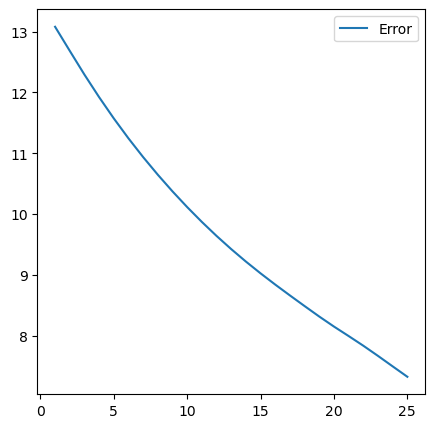

In [22]:
network.fit(X_train, y_train, batch_size=95, n_epoch=25, lr=0.1)

In [23]:
# results on TRAIN DATA
predicts = network.predict(X_train)
predicts = np.argmax(predicts, axis=1)

print('Accuracy_Score = {}'.format(accuracy_score(y_train_real, predicts)))
print('Precision_Score = {}'.format(precision_score(y_train_real, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_train_real, predicts, average='macro')))

#Confusion matrix
cm = confusion_matrix(y_train_real, predicts, labels=digits['target_names'])
pd.DataFrame(cm)

Accuracy_Score = 0.9912490055688147
Precision_Score = 0.9912637949649333
Recall_Score = 0.991330531336972


,0,1,2,3,4,5,6,7,8,9
0,111,0,0,0,1,0,0,0,0,0
1,0,125,0,0,0,0,0,0,1,0
2,0,0,130,0,0,0,0,0,0,0
3,0,0,0,132,0,1,0,0,0,1
4,0,0,0,0,124,0,0,0,0,0
5,0,0,0,0,0,131,0,0,0,1
6,1,0,0,0,0,0,127,0,0,0
7,0,0,0,0,0,0,0,119,0,0
8,0,1,0,0,1,0,0,0,126,1
9,0,0,0,1,0,1,0,0,0,121


In [24]:
# results on TRAIN DATA
predicts = network.predict(X_test)
predicts = np.argmax(predicts, axis=1)

print('Accuracy_Score = {}'.format(accuracy_score(y_real, predicts)))
print('Precision_Score = {}'.format(precision_score(y_real, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_real, predicts, average='macro')))

#Confusion matrix
cm = confusion_matrix(y_real, predicts, labels=digits['target_names'])
pd.DataFrame(cm)

Accuracy_Score = 0.9462962962962963
Precision_Score = 0.9456030398792272
Recall_Score = 0.9436854062118337


,0,1,2,3,4,5,6,7,8,9
0,64,0,0,0,1,1,0,0,0,0
1,1,54,0,0,0,0,0,0,1,0
2,0,1,43,2,0,0,0,0,1,0
3,0,0,0,46,0,2,0,0,0,1
4,0,0,0,0,55,0,0,1,1,0
5,1,0,0,0,0,47,2,0,0,0
6,0,1,0,0,0,0,52,0,0,0
7,0,0,0,0,0,0,0,58,1,1
8,0,2,0,0,0,1,2,0,39,1
9,0,0,0,0,0,2,0,1,1,53


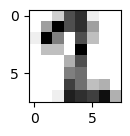

Network thinks that it is number = 2
In fact it is = 2


In [25]:
N = 566

predict = network.predict(digits['data'][N:N+1])
predict = np.argmax(predict, axis=1)[0]

plt.figure(1, figsize=(1.2, 1.2))
plt.imshow(digits.images[N], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

print('Network thinks that it is number = {}'.format(predict))
print('In fact it is = {}'.format((digits.target[N])))

# MNIST

In [26]:
(X_train, y_real_train), (X_test, y_real) = mnist.load_data()

In [27]:
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.0
y_train = transform_y(y_real_train)
y_test = transform_y(y_real)

In [29]:
# Create Network Architecture
inpt_layer = InputLayer(n=X_train.shape[1])
h1 = Layer(n=189, i_n=inpt_layer.n, activation='tanh')
out_layer = Layer(n=10, i_n=h1.n, activation='linear')

network = Network([inpt_layer, h1, out_layer], loss='LogLoss', final_activation='softmax')

Progress: 0% 20% 40% 60% 80% 100%


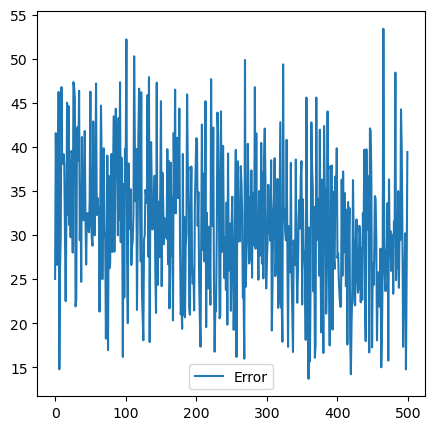

In [33]:
#network.fit(X_train, y_train, lr=0.1, batch_size=455, n_epoch=5)
network.stochastic_fit(X_train, y_train, lr=0.1, batch_size=115, n_rounds=500)

#### Metrics on train data

In [34]:
predicts = network.predict(X_train)
predicts = np.argmax(predicts, axis=1)

print('Accuracy_Score = {}'.format(accuracy_score(y_real_train, predicts)))
print('Precision_Score = {}'.format(precision_score(y_real_train, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_real_train, predicts, average='macro')))

Accuracy_Score = 0.9305833333333333
Precision_Score = 0.9302720441119675
Recall_Score = 0.9295890567968021


#### Metrics on test data

In [35]:
predicts = network.predict(X_test)
predicts = np.argmax(predicts, axis=1)

print('Accuracy_Score = {}'.format(accuracy_score(y_real, predicts)))
print('Precision_Score = {}'.format(precision_score(y_real, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_real, predicts, average='macro')))

Accuracy_Score = 0.9329
Precision_Score = 0.932639760001425
Recall_Score = 0.9319403868375536


In [36]:
#Confusion matrix
cm = confusion_matrix(y_real, predicts, labels=np.arange(10))
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,963,0,1,2,0,3,9,1,1,0
1,0,1114,2,4,0,3,4,1,7,0
2,7,2,941,20,11,2,12,11,21,5
3,0,0,12,949,0,17,2,9,15,6
4,1,3,4,2,913,0,11,2,5,41
5,7,3,6,32,5,787,16,5,24,7
6,6,3,5,3,12,11,915,0,3,0
7,1,8,26,10,9,1,0,940,3,30
8,4,6,5,29,7,14,12,7,882,8
9,8,7,2,13,31,4,1,8,10,925


## Try Conv2D

In [62]:
(X_train, y_real_train), (X_test, y_real) = mnist.load_data()

In [63]:
#X_train = X_train[:10_000]
#y_real_train = y_real_train[:10_000]

In [64]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [36]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1], X_test.shape[2]))

In [37]:
y_train = transform_y(y_real_train)
y_test = transform_y(y_real)

In [38]:
input_layer = InputLayer(i_n_shape=(1, 28, 28))
conv_h1 = Conv2D(n_kernel=48, k_shape=(1, 3, 3), i_n_shape=input_layer.i_n, activation='leaky_relu')
pooler_p1 = MaxPooler(conv_h1.out_shape, (2, 2))
conv_h2 = Conv2D(n_kernel=24, k_shape=(48, 3, 3), i_n_shape=pooler_p1.out_shape, activation='leaky_relu')
pooler_p2 = MaxPooler(conv_h2.out_shape, (2, 2))
flatten = Flatten(pooler_p2.out_shape)
out_layer = Layer(n=10, i_n=flatten.n, activation='linear')

network = Network([input_layer, conv_h1, pooler_p1, conv_h2, pooler_p2, flatten, out_layer], 
                  loss='LogLoss', final_activation='softmax')

Progress: 0% 20% 40% 60% 80% 100%


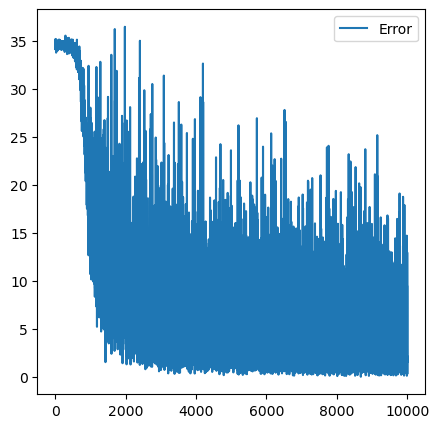

In [39]:
network.stochastic_fit(X_train, y_train, lr=0.01, batch_size=15, n_rounds=10_000)
#network.fit(X_train, y_train, lr=0.01, batch_size=15, n_epoch=2)

In [40]:
predicts = network.predict(X_train)
predicts = np.argmax(predicts, axis=1)

print('Accuracy_Score = {}'.format(accuracy_score(y_real_train, predicts)))
print('Precision_Score = {}'.format(precision_score(y_real_train, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_real_train, predicts, average='macro')))

Accuracy_Score = 0.9185666666666666
Precision_Score = 0.9209349072630222
Recall_Score = 0.9172373921039062


In [41]:
cm = confusion_matrix(y_real_train, predicts, labels=np.arange(10))
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,5694,1,13,17,1,31,84,13,55,14
1,1,6609,34,16,6,17,17,8,29,5
2,40,56,5352,83,20,17,184,96,80,30
3,23,52,90,5499,2,200,42,96,73,54
4,10,50,49,4,4716,14,326,39,46,588
5,59,48,20,144,17,4828,194,30,39,42
6,20,20,10,4,6,28,5819,3,8,0
7,13,67,61,51,23,10,9,5901,16,114
8,18,118,52,138,3,98,144,16,5175,89
9,26,42,12,70,46,32,27,123,50,5521


In [42]:
predicts = network.predict(X_test)
predicts = np.argmax(predicts, axis=1)

print('Accuracy_Score = {}'.format(accuracy_score(y_real, predicts)))
print('Precision_Score = {}'.format(precision_score(y_real, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_real, predicts, average='macro')))

Accuracy_Score = 0.9219
Precision_Score = 0.9241613402554361
Recall_Score = 0.9208525436907096


In [43]:
cm = confusion_matrix(y_real, predicts, labels=np.arange(10))
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,945,0,2,2,0,4,19,3,4,1
1,0,1115,3,3,0,1,4,1,8,0
2,9,6,947,11,2,0,28,17,9,3
3,4,3,12,926,0,29,3,15,13,5
4,0,6,9,0,790,1,70,9,4,93
5,9,4,2,31,2,796,33,5,5,5
6,6,4,0,1,2,4,938,2,1,0
7,0,20,20,16,1,3,1,942,1,24
8,6,5,3,18,4,17,26,10,879,6
9,7,11,0,7,10,6,4,16,7,941


In [50]:
# Results

def check_images(start, end, X_data, y_data, network):
    for N in range(start, end):

        predict = np.argmax(network.predict(X_data[N:N+1]), axis=1).squeeze()

        plt.figure(1, figsize=(0.7, 0.7))
        plt.imshow(X_data[N][0], cmap=plt.get_cmap('gray'))
        plt.show()

        print('Network thinks that it is number = {}'.format(predict))
        print('In fact it is = {}'.format(y_data[N]))

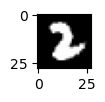

Network thinks that it is number = 2
In fact it is = 2


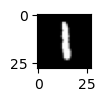

Network thinks that it is number = 1
In fact it is = 1


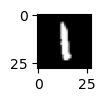

Network thinks that it is number = 1
In fact it is = 1


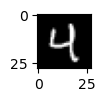

Network thinks that it is number = 4
In fact it is = 4


In [51]:
check_images(3229, 3233, X_test, y_real, network)

# Recurrent Network

In [70]:
(X_train, y_real_train), (X_test, y_real) = mnist.load_data()

In [71]:
#X_train = X_train[:1_000]
#y_real_train = y_real_train[:1_000]

X_train = X_train / 255.0
X_test = X_test / 255.0

In [72]:
y_train = transform_y(y_real_train)
y_test = transform_y(y_real)

In [73]:
def seq_to_seq_transformation(seq_x, seq_y):
    
    assert type(seq_x) == type(seq_y) or type(seq_x) == list or type(seq_y) == list, 'Wrong types for sequences'
    
    if len(seq_x) == len(seq_y):
        return (seq_x, seq_y)
    
    new_seq_y = seq_y[::-1] + [None] * (len(seq_x) - len(seq_y))
    return (seq_x, new_seq_y[::-1])

def pictures_to_sequence(x, y, step=1):
    
    seq_x = [[picture[:, column:column + step].reshape((-1, 1)) for column in range(0, picture.shape[1], step)] for picture in x]
    seq_y = [[result.reshape((-1, 1))] for result in y]
    
    seq_y = [seq_to_seq_transformation(x_elem, y_elem)[1] for x_elem, y_elem in zip(seq_x, seq_y)]
    
    return seq_x, seq_y

In [74]:
X_train, y_train = pictures_to_sequence(X_train, y_train, step=4)
X_test, y_test = pictures_to_sequence(X_test, y_test, step=4)

In [80]:
input_layer = InputLayer(i_n_shape=112)
h1 = Layer(n=55, i_n=input_layer.i_n, activation='sigmoid')
out_layer = RecurrentLayer(i_n=h1.get_out_shape(), memo_n=189, out_n=10, memo_act='leaky_relu', activation='linear')

network = RecurrentNetwork(layers=[input_layer, h1, out_layer], 
                           final_activation='softmax', loss='LogLoss')

Epoch #1: 0% 20% 40% 60% 80% 100%
Time = 112.28 sec
Epoch #2: 0% 20% 40% 60% 80% 100%
Time = 118.61 sec
Epoch #3: 0% 20% 40% 60% 80% 100%
Time = 123.25 sec
Epoch #4: 0% 20% 40% 60% 80% 100%
Time = 111.57 sec
Epoch #5: 0% 20% 40% 60% 80% 100%
Time = 112.16 sec


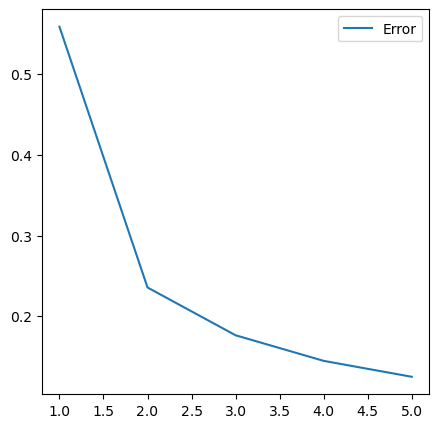

In [81]:
#network.stochastic_fit(X_train, y_train, n_rounds=100, lr=0.01)
network.fit(X_train, y_train, n_epochs=5, lr=0.001)

In [82]:
predicts = network.predict(X_train)
predicts = np.array([np.argmax(predict[-1]) for predict in predicts])

print('Accuracy_Score = {}'.format(accuracy_score(y_real_train, predicts)))
print('Precision_Score = {}'.format(precision_score(y_real_train, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_real_train, predicts, average='macro')))

Accuracy_Score = 0.9581166666666666
Precision_Score = 0.958157964798248
Recall_Score = 0.9578976619904372


In [83]:
cm = confusion_matrix(y_real_train, predicts, labels=np.arange(10))
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,5845,2,3,2,8,7,15,6,24,11
1,1,6653,11,12,22,5,8,9,11,10
2,49,68,5531,50,41,14,31,55,108,11
3,11,13,22,5749,5,133,7,63,78,50
4,11,4,4,0,5714,6,30,1,2,70
5,15,24,5,63,30,5184,19,2,59,20
6,39,14,5,0,32,66,5740,0,22,0
7,11,26,43,4,72,5,0,5899,18,187
8,22,98,4,32,45,44,20,5,5500,81
9,26,8,2,20,144,34,1,24,18,5672


In [84]:
predicts = network.predict(X_test)
predicts = np.array([np.argmax(predict[-1]) for predict in predicts])

print('Accuracy_Score = {}'.format(accuracy_score(y_real, predicts)))
print('Precision_Score = {}'.format(precision_score(y_real, predicts, average='macro')))
print('Recall_Score = {}'.format(recall_score(y_real, predicts, average='macro')))

Accuracy_Score = 0.9559
Precision_Score = 0.9558163514272708
Recall_Score = 0.9556101925309948


In [85]:
cm = confusion_matrix(y_real, predicts, labels=np.arange(10))
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,969,0,0,0,0,1,5,1,4,0
1,0,1125,0,2,0,2,3,0,3,0
2,10,9,958,15,5,1,7,8,18,1
3,1,0,3,958,1,16,0,13,10,8
4,1,0,3,0,953,0,5,0,0,20
5,5,1,0,18,6,848,2,0,8,4
6,13,3,2,0,8,13,917,0,2,0
7,2,11,13,1,14,0,0,955,4,28
8,4,4,1,5,8,12,2,2,919,17
9,3,4,1,3,29,8,0,4,0,957
